## The New York Times made a dataset about COVID19 new cases and deaths by state

My objective with this dataset is to understand the state and date of the new cases that appeared and how have they developed through February, March and April. Moreover, identifying where the most cases are concentrated.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nyt = pd.read_csv('covid-19-state-level-data.csv')

In [3]:
nyt.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
nyt.tail(1) # To check for the last date of data entry

,date,state,fips,cases,deaths
3093,2020-04-27,Wyoming,56,389,7


In [5]:
nyt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 5 columns):
date      3094 non-null object
state     3094 non-null object
fips      3094 non-null int64
cases     3094 non-null int64
deaths    3094 non-null int64
dtypes: int64(3), object(2)
memory usage: 121.0+ KB


Our date column is an 'object' type and therefore we need to transform it into a datetime object and I will add some columns for days and months

In [6]:
nyt['date'] = pd.to_datetime(nyt['date'])
nyt['month'] = nyt['date'].apply(lambda date: date.month)
nyt['day'] = nyt['date'].apply(lambda date: date.day)

Check for missing values

In [7]:
nyt.isnull().sum() # No missing values found

date      0
state     0
fips      0
cases     0
deaths    0
month     0
day       0
dtype: int64

# EDA

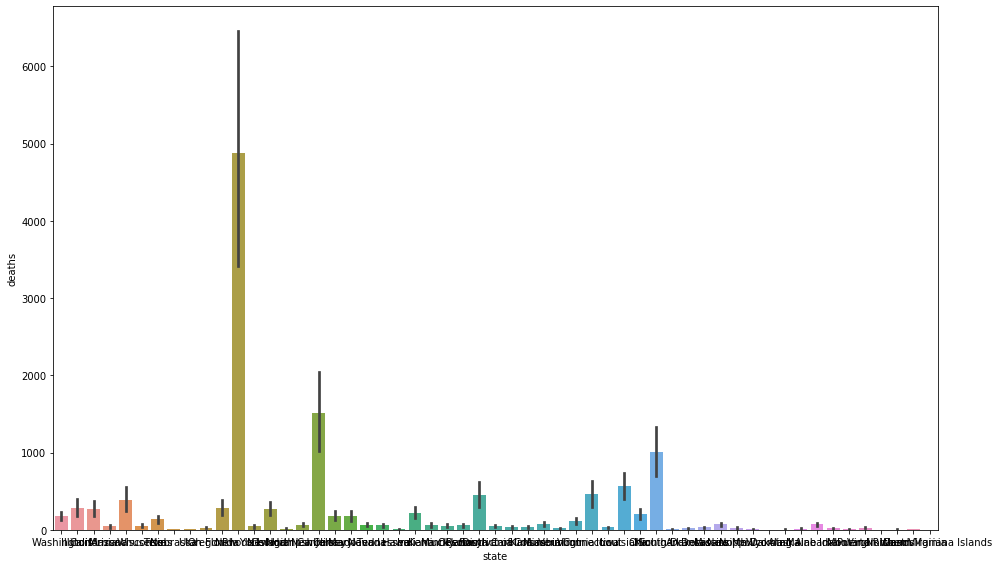

In [8]:
plt.figure(figsize=(14,8))
sns.barplot(x='state', y='deaths', data=nyt)
plt.tight_layout()


This graph has too many states in the X axis which makes it unintelligible. Therefore another approach will be taken by dividing the states in 3 groups in order to visualize them better.

In [9]:
nyt['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

Depending on the objective of the analysis, there are different ways that could be more useful. 
In this case I will make 3 groups for West, Mid, East. 

In [10]:
west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico',
       'Oregon', 'Utah', 'Washington', 'Wyoming']

mid = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas', 'Minnesota', 'Iowa', 'Missouri',
       'Arkansas', 'Louisiana', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio', 'Kentucky', 'Tennessee',
       'West Virginia', 'Mississippi', 'Alabama']

east = ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania',
        'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']

The most impacted western states are California, Colorado and Washington

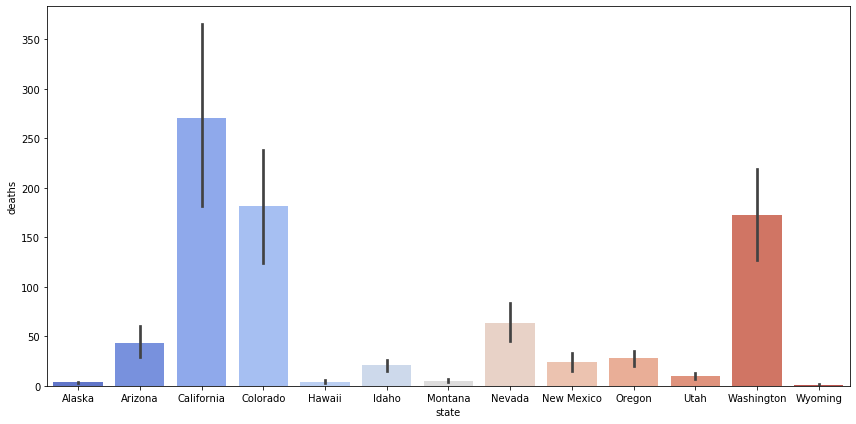

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', order=west, data=nyt, palette='coolwarm')
plt.tight_layout()


Since the deaths column only shows the total amount for each day I can't perform a simple 
.sum() after nyt[nyt['state'][deaths], otherwise it will return a distorted sum. 

In [12]:
# California
calif_deaths = nyt[nyt['state']=='California'][-1:]['deaths'].sum()

# Colorado
color_deaths = nyt[nyt['state']=='Colorado'][-1:]['deaths'].sum()

# Washington
washington_deaths = nyt[nyt['state']=='Washington'][-1:]['deaths'].sum()

print('Total deaths in California by April 27th: \n', calif_deaths, '\n')
print('Total deaths in Colorado by April 27th: \n', color_deaths, '\n')
print('Total deaths in Washington State by April 27th: \n', washington_deaths, '\n')

Total deaths in California by April 27th: 
 1800 

Total deaths in Colorado by April 27th: 
 705 

Total deaths in Washington State by April 27th: 
 771 



After seeing the most impacted western states lets take a look at the Central States. 

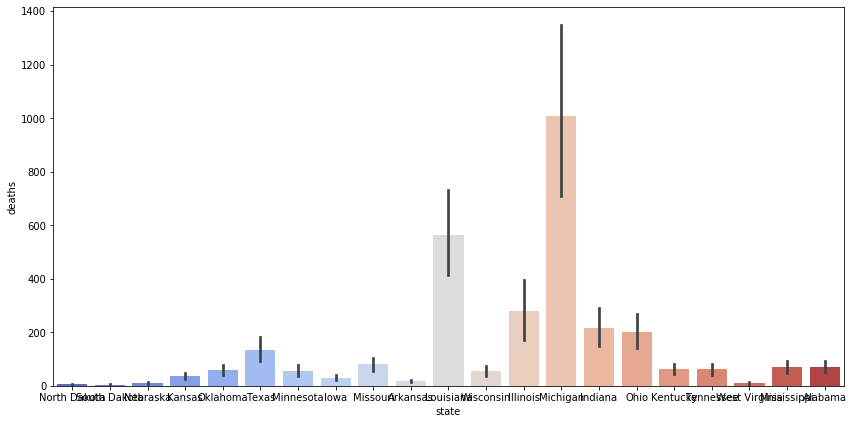

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', order=mid, data=nyt, palette='coolwarm')
plt.tight_layout() 

The Central States seem to still be too many to visualize properly. There I will divide it further. 

In [14]:
mid = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas', 'Minnesota', 'Iowa', 'Missouri',
       'Arkansas', 'Louisiana', 'Wisconsin']
mid2 = ['Illinois', 'Michigan', 'Indiana', 'Ohio', 'Kentucky', 'Tennessee',
       'West Virginia', 'Mississippi', 'Alabama']

First half of Central States. Louisiana is the most affected state.

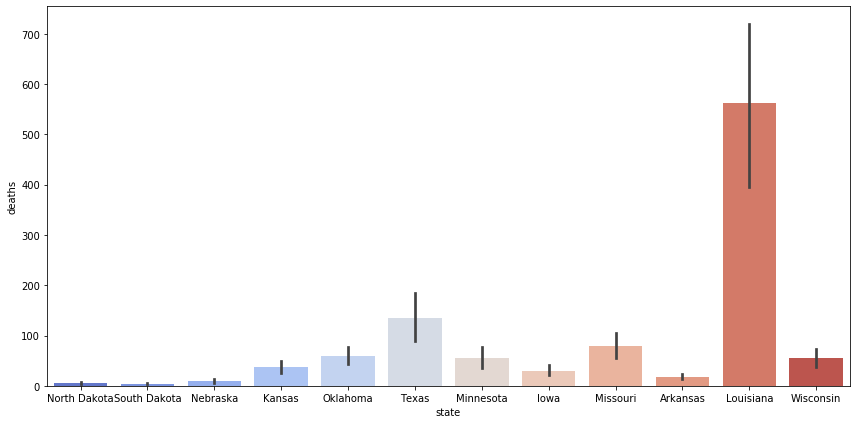

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', order=mid, data=nyt, palette='coolwarm')
plt.tight_layout() 

In [16]:
# Louisiana
louis_deaths= nyt[nyt['state']=='Louisiana'][-1:]['deaths'].sum()
print('Total deaths in Louisiana by April 27th: \n', louis_deaths)

Total deaths in Louisiana by April 27th: 
 1697


And the second half of Central States. The most affected one is Michigan. 

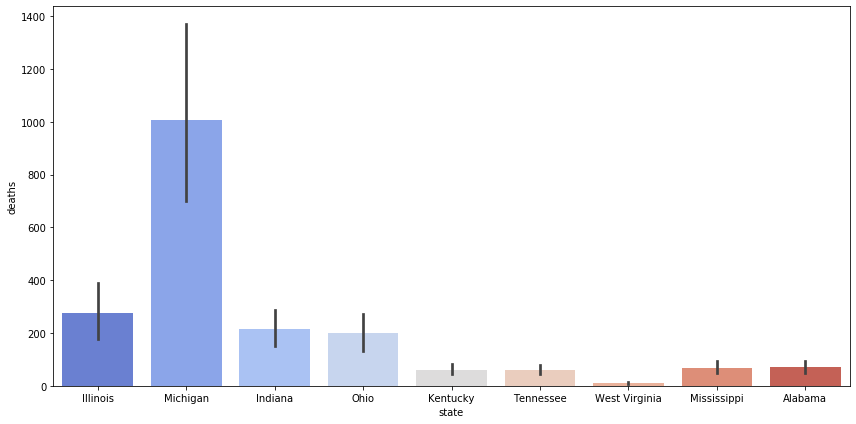

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', order=mid2, data=nyt, palette='coolwarm')
plt.tight_layout() 

In [18]:
# Michigan
mich_deaths = nyt[nyt['state']=='Michigan'][-1:]['deaths'].sum()
print('Total deaths in Michigan by April 27th: \n', mich_deaths)

Total deaths in Michigan by April 27th: 
 3406


The easter states seem to be too many for them to be visualized properly, will therefore divide them further.

In [19]:
east = ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
east2 = ['Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']

In the first half of eastern states, New York and New Jersey are the most affected ones.

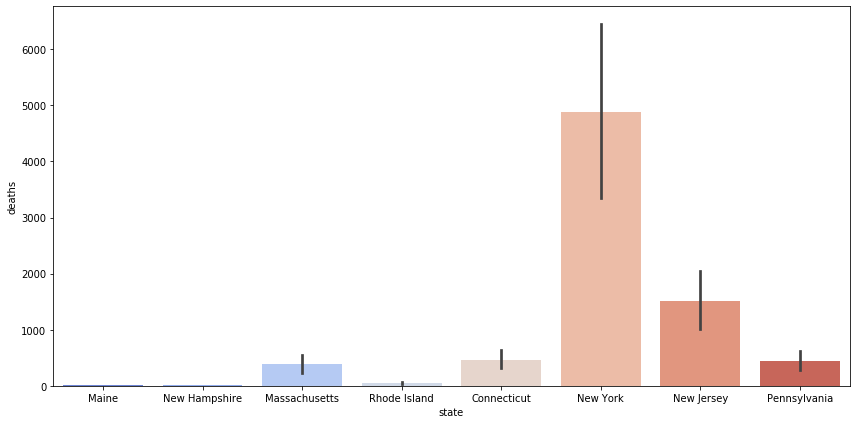

In [20]:
# First half

plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', order=east, data=nyt, palette='coolwarm')
plt.tight_layout()

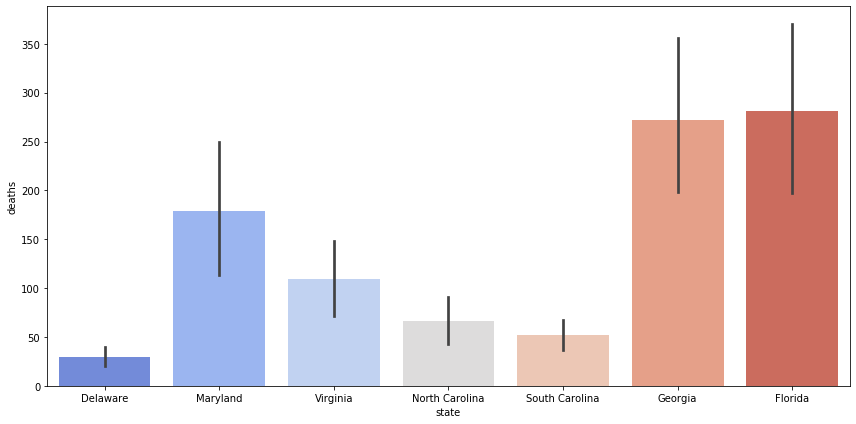

In [21]:
# Second half

plt.figure(figsize=(12,6))
sns.barplot(x='state', y='deaths', order=east2, data=nyt, palette='coolwarm')
plt.tight_layout()

In [22]:
# New York
ny_deaths = nyt[nyt['state']=='New York'][-1:]['deaths'].sum()
print('Total deaths in New York by April 27th: \n', ny_deaths)

Total deaths in New York by April 27th: 
 17303


At this point I want to see the temporal distribution of new cases and deaths. 

In [23]:
april = nyt[nyt['month']==4]
march = nyt[nyt['month']==3]
february = nyt[nyt['month']==2]

# Deaths by Month

april_deaths = sorted(april['deaths'].unique())[-1:][0]
march_deaths = sorted(march['deaths'].unique())[-1:][0]
feb_deaths = sorted(february['deaths'].unique())[-1:][0]

total_deaths = april_deaths+march_deaths+feb_deaths

# New cases by Month

april_case = sorted(april['cases'].unique())[-1:][0]
march_case = sorted(march['cases'].unique())[-1:][0]
feb_case = sorted(february['cases'].unique())[-1:][0]

total_cases = april_case+march_case+feb_case

print(f'The total US deaths by month goes as follow: \n February: {feb_deaths} \n March: {march_deaths} \n April: {april_deaths} \n \n For a total of: {total_deaths} \n')

print(f'The total US cases by month goes as follow: \n February: {feb_case} \n March: {march_case} \n April: {april_case} \n \n For a total of: {total_cases} \n')

The total US deaths by month goes as follow: 
 February: 1 
 March: 1550 
 April: 17303 
 
 For a total of: 18854 

The total US cases by month goes as follow: 
 February: 28 
 March: 75832 
 April: 292027 
 
 For a total of: 367887 



In [24]:
pct_increase_deaths = ((april_deaths-march_deaths)/march_deaths)*100
print(f'The percentual increase of US total deaths from March to April is: \n {round(pct_increase_deaths, 2)}' + '%')

The percentual increase of US total deaths from March to April is: 
 1016.32%


In [25]:
pct_increase_deaths1 = ((march_deaths-feb_deaths)/feb_deaths)*100
print(f'The percentual increase of US total deaths from February to March is: \n {round(pct_increase_deaths1, 2)}' + '%')

The percentual increase of US total deaths from February to March is: 
 154900.0%


This huge increase is explained both by the fact that in february there were only 28 deaths and that deaths exploded in march. 

### Most impacted state overall is New York

Let's see how new cases and deaths evolved over time. 

### Total Cases in NY

In [26]:
ny = nyt[nyt['state']=='New York']

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(0, 300000)

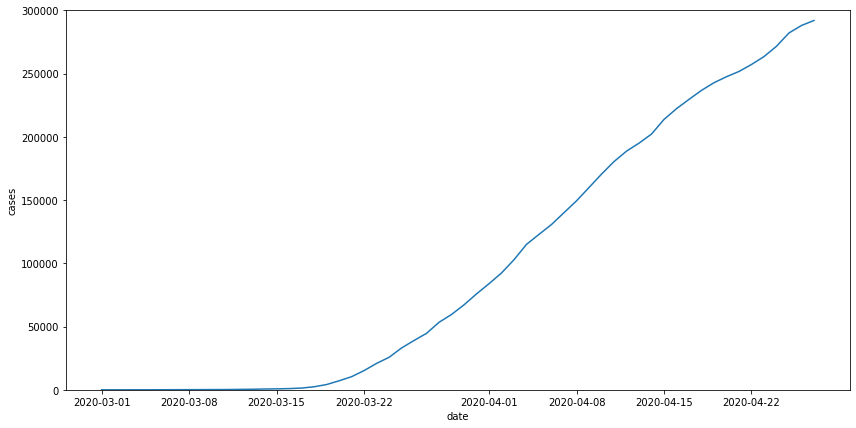

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='cases', data=ny)
plt.tight_layout()
plt.ylim(0, 300000)

### Total Deaths in NY

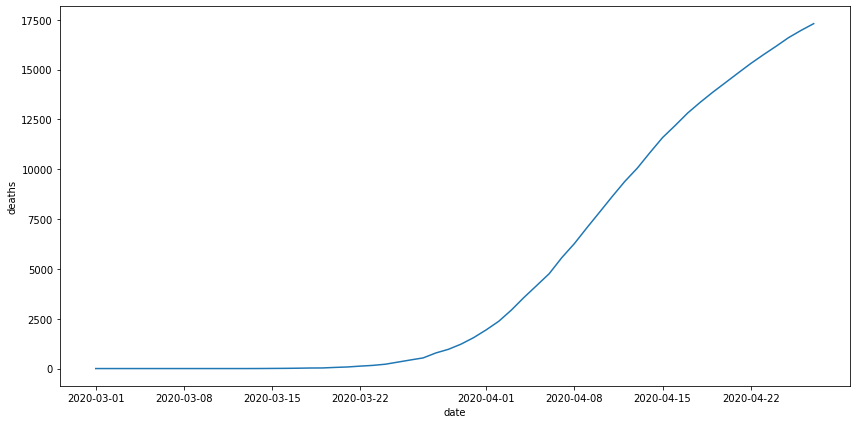

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='deaths', data=ny)
plt.tight_layout()

In [29]:
nyt[(nyt['state']=='New York') & (nyt['date']=='2020-04-27')]['deaths']

3072    17303
Name: deaths, dtype: int64

https://www.syracuse.com/coronavirus-ny/ has a different quantity with 16,064 total deaths by April 22nd while here we get only 18,154.


### The 2nd most affected state is New Jersey

In [30]:
nj = nyt[nyt['state']=='New Jersey']

Let's see how new cases and deaths evolved over time. 

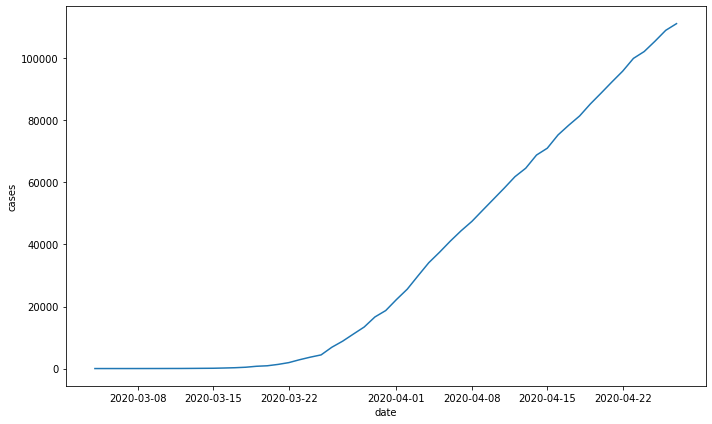

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='cases', data=nj)
plt.tight_layout()

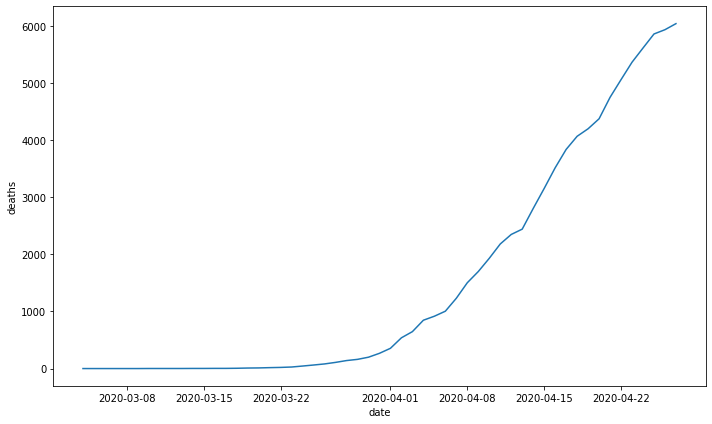

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='deaths', data=nj)
plt.tight_layout()

This concludes my EDA for the spread of Covid in the US by April 27th. It reveals how New York and New Jersey are the two most impacted states overall. 